In [1]:
#IMPORTING THE LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Reading the dataset 
churn=pd.read_csv('Churn.csv')

In [3]:
churn

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
#removing the unwanted column of the data 
df=churn.copy()
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
df.shape

(5000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

Observaton: we saw that there are 7 columns with object
            6 columns with float &
            7 columns with integer datatypes 

In [7]:
# now to convert to required datatypes 
df["day.charge"] = df["day.charge"].astype("float64")
df["eve.mins"]= df["eve.mins"].astype("float64")

In [8]:
# taking the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

in info now we can see that there are some null values 

In [9]:
#now to check the nul values 
df.isna().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [10]:
percent= df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent})
missing_value_df

,column_name,percent_missing
state,state,0.00
area.code,area.code,0.00
account.length,account.length,0.00
voice.plan,voice.plan,0.00
voice.messages,voice.messages,0.00
intl.plan,intl.plan,0.00
intl.mins,intl.mins,0.00
intl.calls,intl.calls,0.00
intl.charge,intl.charge,0.00
day.mins,day.mins,0.00


Observation : we can see that the percentage of null values is very low so we can either remove or replace it with the mean of the respective column 


In [11]:
#filling the null values and checking info again 
df['day.charge']=df['day.charge'].fillna(df['day.charge'].mean())
df['eve.mins']=df['eve.mins'].fillna(df['eve.mins'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [12]:
#checking the no of unique values from each column 
df.nunique()

state               51
area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1962
eve.mins          1877
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

Observation : we can see that churn is our target variable and has 2 values so we can convert it to numeric from object 
             and also we can convert voice plan and international plan to numeric also coverting the voice plan and intl plan to numeric because they have only 2 values as well

In [13]:
LE=LabelEncoder()
df=pd.get_dummies(df,columns=['voice.plan','intl.plan'])
df['churn']=LE.fit_transform(df['churn'])
df

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,...,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan_no,voice.plan_yes,intl.plan_no,intl.plan_yes
0,KS,area_code_415,128,25,10.0,3,2.70,265.1,110,45.07,...,16.78,244.7,91,11.01,1,0,0,1,1,0
1,OH,area_code_415,107,26,13.7,3,3.70,161.6,123,27.47,...,16.62,254.4,103,11.45,1,0,0,1,1,0
2,NJ,area_code_415,137,0,12.2,5,3.29,243.4,114,41.38,...,10.30,162.6,104,7.32,0,0,1,0,1,0
3,OH,area_code_408,84,0,6.6,7,1.78,299.4,71,50.90,...,5.26,196.9,89,8.86,2,0,1,0,0,1
4,OK,area_code_415,75,0,10.1,3,2.73,166.7,113,28.34,...,12.61,186.9,121,8.41,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,40,9.9,5,2.67,235.7,127,40.07,...,18.96,297.5,116,13.39,2,0,0,1,1,0
4996,WV,area_code_415,152,0,14.7,2,3.97,184.2,90,31.31,...,21.83,213.6,113,9.61,3,1,1,0,1,0
4997,DC,area_code_415,61,0,13.6,4,3.67,140.6,89,23.90,...,14.69,212.4,97,9.56,1,0,1,0,1,0
4998,DC,area_code_510,109,0,8.5,6,2.30,188.8,67,32.10,...,14.59,224.4,89,10.10,0,0,1,0,1,0


In [14]:
# dropping the no dummies as they are not of use and are also not needed 
p=['voice.plan_no','intl.plan_no']
df=df.drop(p,axis=1)
df

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan_yes,intl.plan_yes
0,KS,area_code_415,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,OH,area_code_415,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,NJ,area_code_415,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0,0
3,OH,area_code_408,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0,1
4,OK,area_code_415,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,1,0
4996,WV,area_code_415,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1,0,0
4997,DC,area_code_415,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,0,0
4998,DC,area_code_510,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,0,0


In [15]:
df= df.rename(columns={'voice.plan_yes': 'voice.plan','intl.plan_yes':'intl.plan'})

In [16]:
#checking for duplicates 
df.duplicated().sum()

0

In [17]:
df.shape 

(5000, 20)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account.length,5000.0,100.258600,39.694560,1.0,73.00,100.000,127.00,243.00
voice.messages,5000.0,7.755200,13.546393,0.0,0.00,0.000,17.00,52.00
intl.mins,5000.0,10.261780,2.761396,0.0,8.50,10.300,12.00,20.00
intl.calls,5000.0,4.435200,2.456788,0.0,3.00,4.000,6.00,20.00
intl.charge,5000.0,2.771196,0.745514,0.0,2.30,2.780,3.24,5.40
day.mins,5000.0,180.288900,53.894699,0.0,143.70,180.100,216.20,351.50
day.calls,5000.0,100.029400,19.831197,0.0,87.00,100.000,113.00,165.00
day.charge,5000.0,30.653501,9.159936,0.0,24.43,30.625,36.75,59.76
eve.mins,5000.0,200.580326,50.433135,0.0,166.60,200.800,233.90,363.70
eve.calls,5000.0,100.191000,19.826496,0.0,87.00,100.000,114.00,170.00


In [19]:
# Checking the value counts of churns 
df['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [20]:
percentage= df['churn'].value_counts()* 100 / len(df)
percentage

0    85.86
1    14.14
Name: churn, dtype: float64

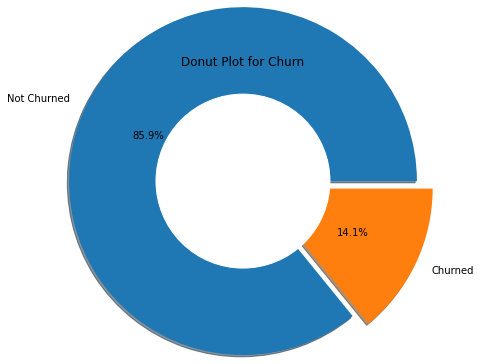

In [21]:
donut= df['churn'].value_counts()
plt.pie(donut , explode=(0, 0.2),autopct='%1.1f%%',shadow=True,radius=2.0, labels =['Not Churned','Churned'])
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

###### we can see that most of our customers are not churned and only 14% of customers are churning 

In [22]:
# checking the percentage of people who took the voice plan 
p_voice=df['voice.plan'].value_counts()* 100/len(df)
p_voice

0    73.54
1    26.46
Name: voice.plan, dtype: float64

<AxesSubplot:xlabel='voice.plan', ylabel='count'>

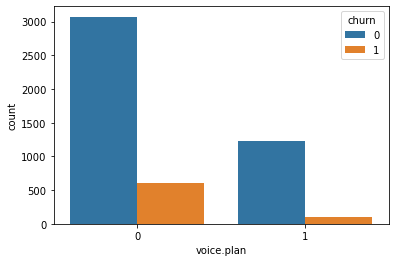

In [23]:
sns.countplot(x='voice.plan',hue="churn",data = df)

In [24]:
# checking the no of people who took international plan 
p_intl=df['intl.plan'].value_counts()* 100/len(df)
p_intl

0    90.54
1     9.46
Name: intl.plan, dtype: float64

<AxesSubplot:xlabel='intl.plan', ylabel='count'>

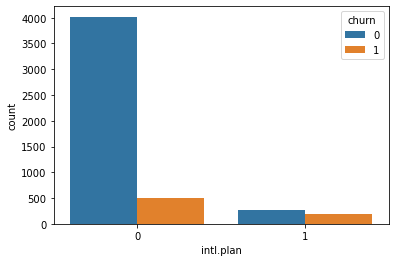

In [25]:
sns.countplot(x='intl.plan',hue="churn",data = df)

###### blue  denotes that people have not churned 
###### orange denotes that people have churned 
Observation : we can see that how many people have taken the respective plan and churned or not and same for who did not take the plan and churned or not 

In [26]:
#checking the no of people who took international plan and churned 
intl_churned = df.groupby(['intl.plan', 'churn']).size()
intl_churned

intl.plan  churn
0          0        4019
           1         508
1          0         274
           1         199
dtype: int64

In [27]:
# getting the percentage 
p_intlChurned=intl_churned *100 / len(df)
p_intlChurned

intl.plan  churn
0          0        80.38
           1        10.16
1          0         5.48
           1         3.98
dtype: float64

###### we can see that 10% of our customers took international plans out of which 3% churned 

In [28]:
# checking the no of people who took voice plan 
p_voice=df['voice.plan'].value_counts()* 100/len(df)
p_voice

0    73.54
1    26.46
Name: voice.plan, dtype: float64

In [29]:
#checking the no of people who took voice plan and churned 
voice_churned = df.groupby(['voice.plan', 'churn']).size()
voice_churned

voice.plan  churn
0           0        3072
            1         605
1           0        1221
            1         102
dtype: int64

In [30]:
# getting the percentage 
p_voiceChurned=voice_churned *100 / len(df)
p_voiceChurned

voice.plan  churn
0           0        61.44
            1        12.10
1           0        24.42
            1         2.04
dtype: float64

Observation : We can see that 26% of people took voice plan and out of them 2 % churned 

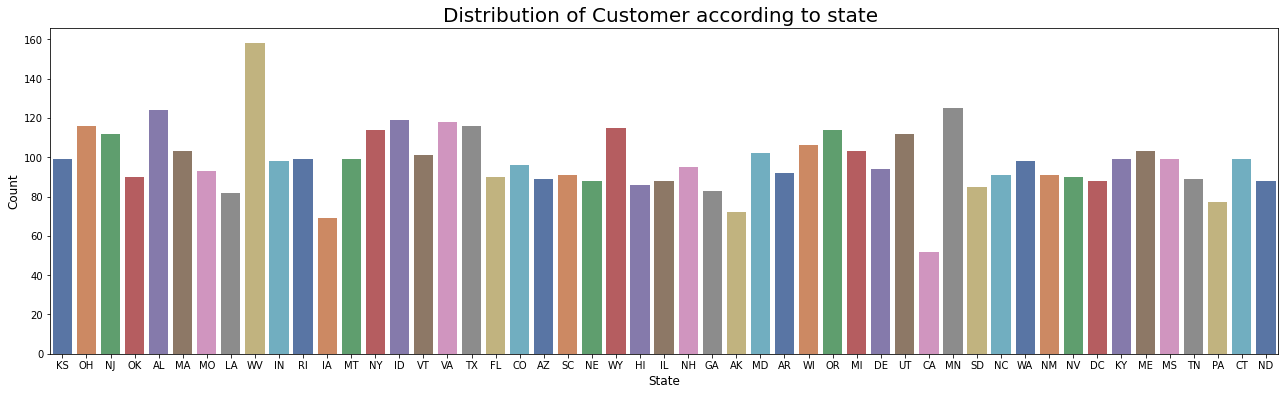

In [31]:
#now to check the distribution of our data acc to state and area.code 
plt.figure(figsize=(22,6))
sns.countplot(x = df.state,palette='deep')
plt.xlabel('State', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer according to state ",fontsize= 20)
plt.show()

Observation : We can see how many people are from different states in our dataset

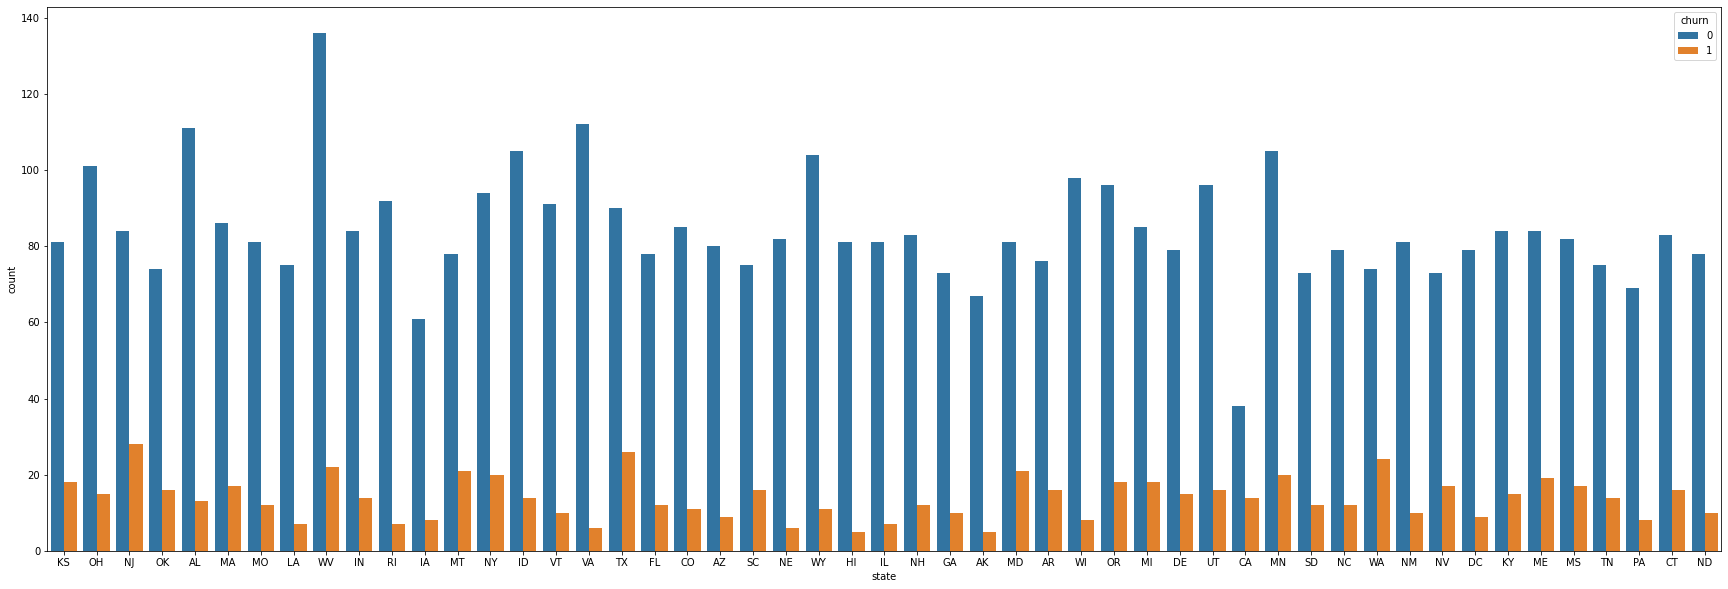

In [32]:
# to check the ratio of churners and non churners from every state 
plt.figure(figsize=(30,10))
sns.countplot(x='state',hue='churn',data=df)
plt.show()

Observation : We can see that how many people from each state have churned or not 

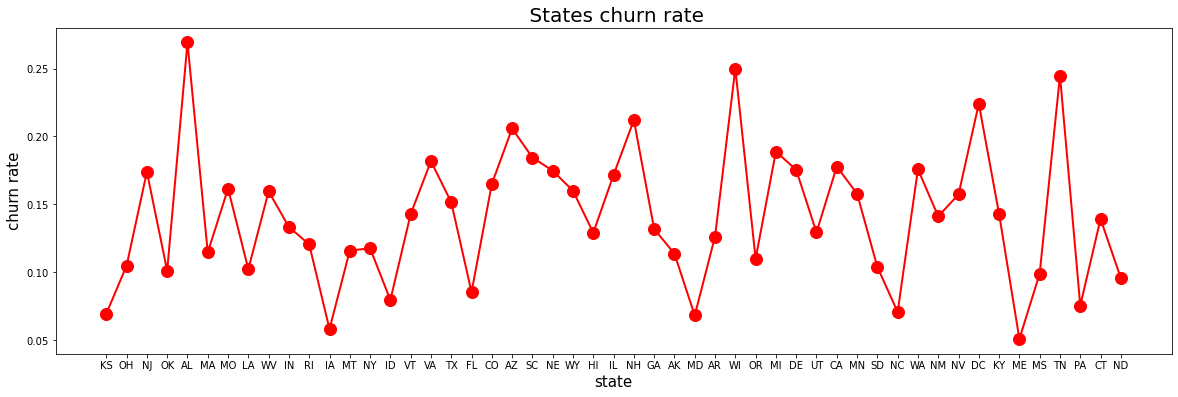

In [33]:
s1=df['state'].unique()
s2=df.groupby(['state'])['churn'].mean()

plt.rcParams['figure.figsize'] = (20, 6)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

Observation: we can see that ME has the lowest churn rate of all states and AL has the highest churn rate in all the states 

In [34]:
#calculating Statewise Churn percentage
state = pd.crosstab(df["state"],df["churn"])
state['Percentage_Churn'] = state.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
state

churn,0,1,Percentage_Churn
state,,,
AK,67,5,6.944444
AL,111,13,10.483871
AR,76,16,17.391304
AZ,80,9,10.112360
CA,38,14,26.923077
CO,85,11,11.458333
CT,83,16,16.161616
DC,79,9,10.227273
DE,79,15,15.957447


we can see the churn percentage from each state 

In [35]:
# now to check states where churn rate is most 
churned_most =df.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(5) * 100
churned_most

state
CA    26.923077
NJ    25.000000
WA    24.489796
TX    22.413793
MT    21.212121
Name: churn, dtype: float64

In [36]:
# to check the least churned state wise 
churned_least =df.groupby(['state'])['churn'].mean().sort_values(ascending = False).tail(5) * 100
churned_least 

state
RI    7.070707
AK    6.944444
NE    6.818182
HI    5.813953
VA    5.084746
Name: churn, dtype: float64

We can see the percentage of the top 5 and bottom 5 state wise 

array([[<AxesSubplot:title={'center':'account.length'}>,
        <AxesSubplot:title={'center':'voice.messages'}>,
        <AxesSubplot:title={'center':'intl.mins'}>,
        <AxesSubplot:title={'center':'intl.calls'}>],
       [<AxesSubplot:title={'center':'intl.charge'}>,
        <AxesSubplot:title={'center':'day.mins'}>,
        <AxesSubplot:title={'center':'day.calls'}>,
        <AxesSubplot:title={'center':'day.charge'}>],
       [<AxesSubplot:title={'center':'eve.mins'}>,
        <AxesSubplot:title={'center':'eve.calls'}>,
        <AxesSubplot:title={'center':'eve.charge'}>,
        <AxesSubplot:title={'center':'night.mins'}>],
       [<AxesSubplot:title={'center':'night.calls'}>,
        <AxesSubplot:title={'center':'night.charge'}>,
        <AxesSubplot:title={'center':'customer.calls'}>,
        <AxesSubplot:title={'center':'churn'}>],
       [<AxesSubplot:title={'center':'voice.plan'}>,
        <AxesSubplot:title={'center':'intl.plan'}>, <AxesSubplot:>,
        <AxesSubplot:>]

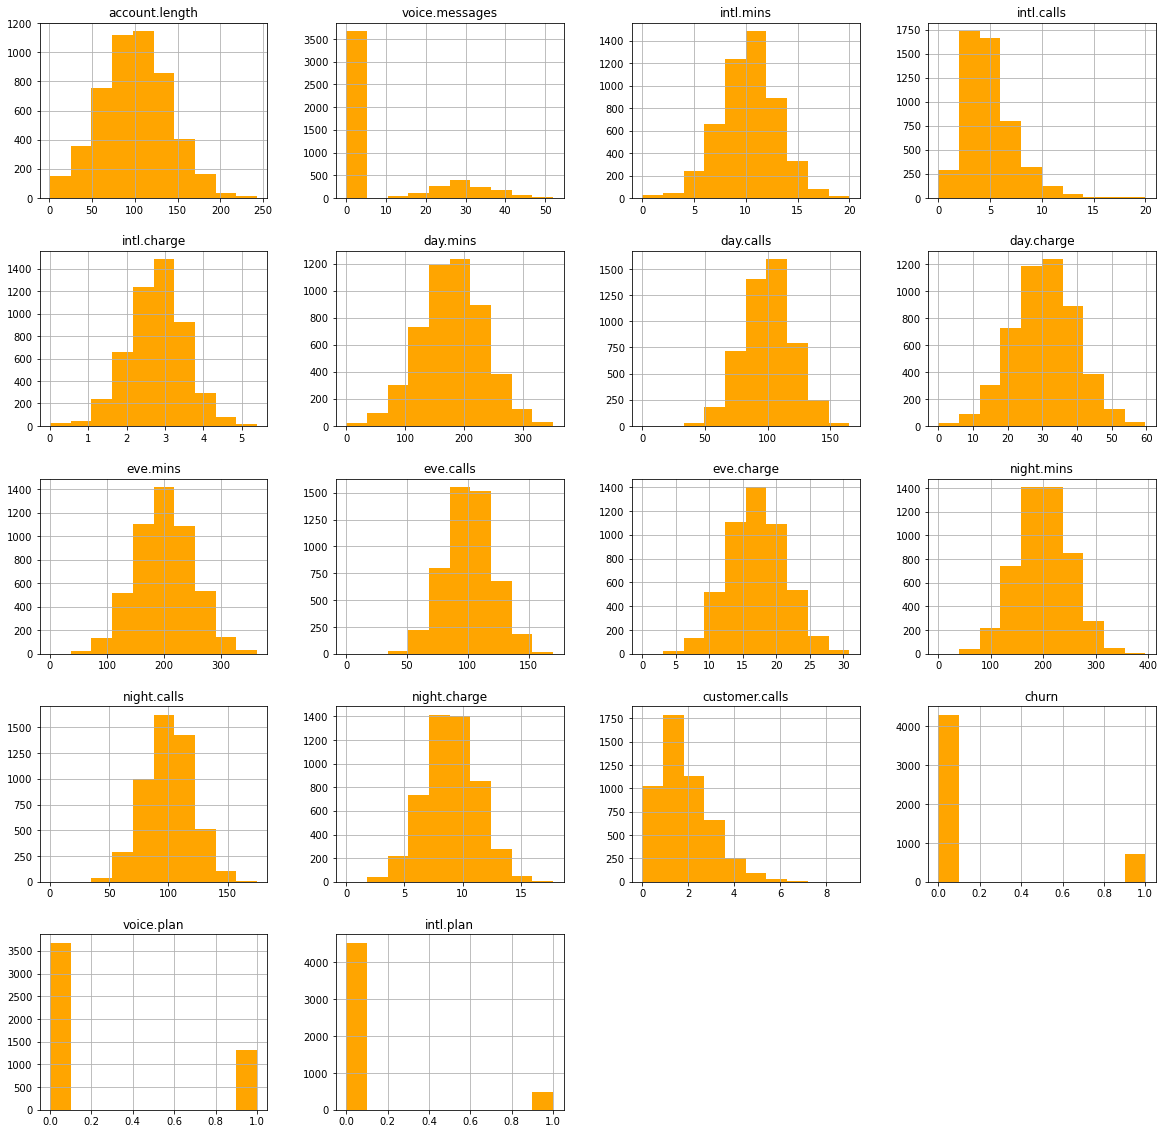

In [37]:
df.hist(figsize=(20,20),alpha=1.0,color='orange')

 this histogram shows the distribution of our complete datset 
 

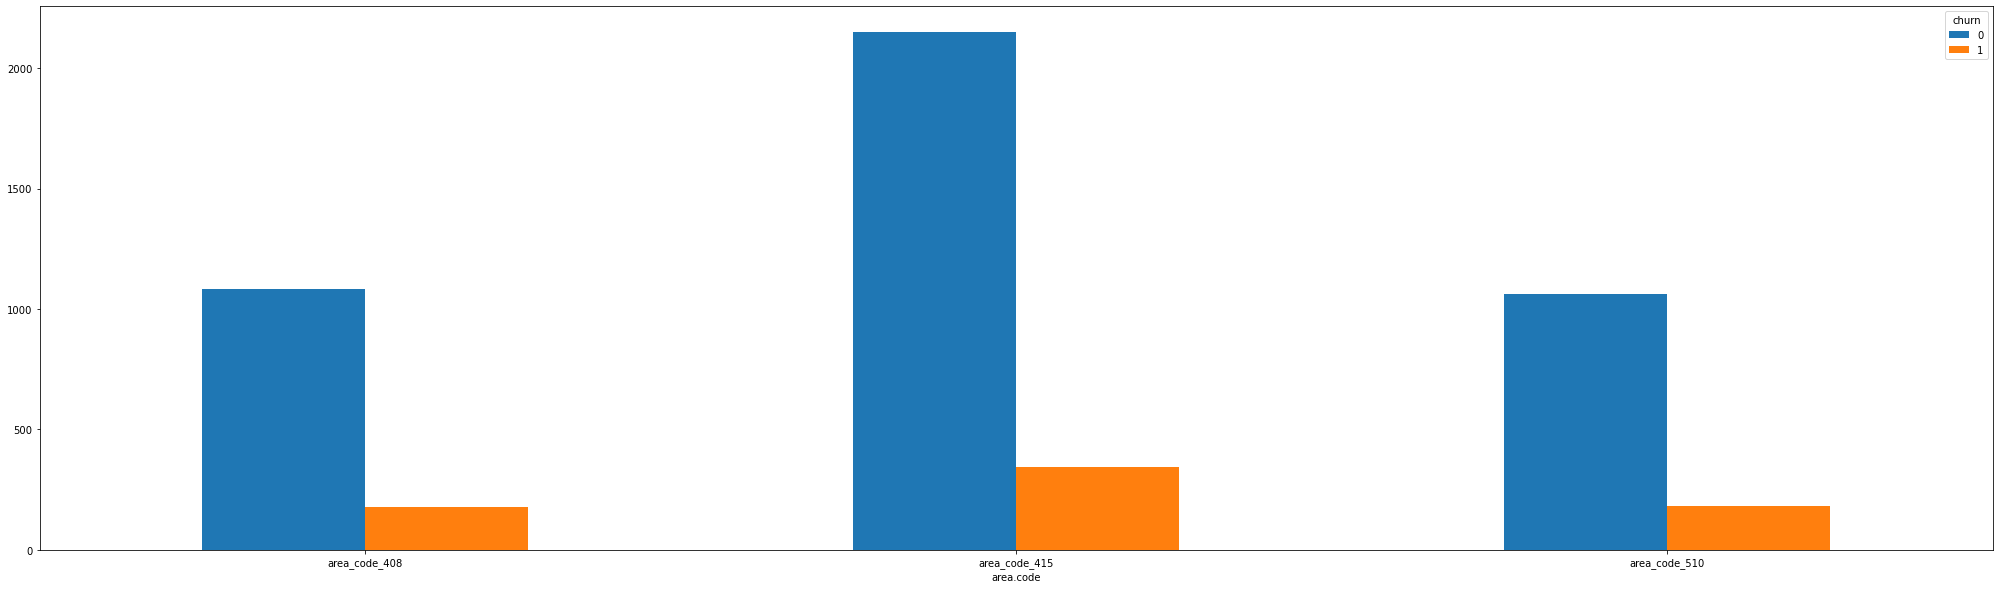

In [38]:
crosstb=pd.crosstab(df['area.code'],df.churn)
barplot = crosstb.plot.bar(rot=0,figsize=(35,10))
plt.show()

Here we can see the distribution acc to area.code 

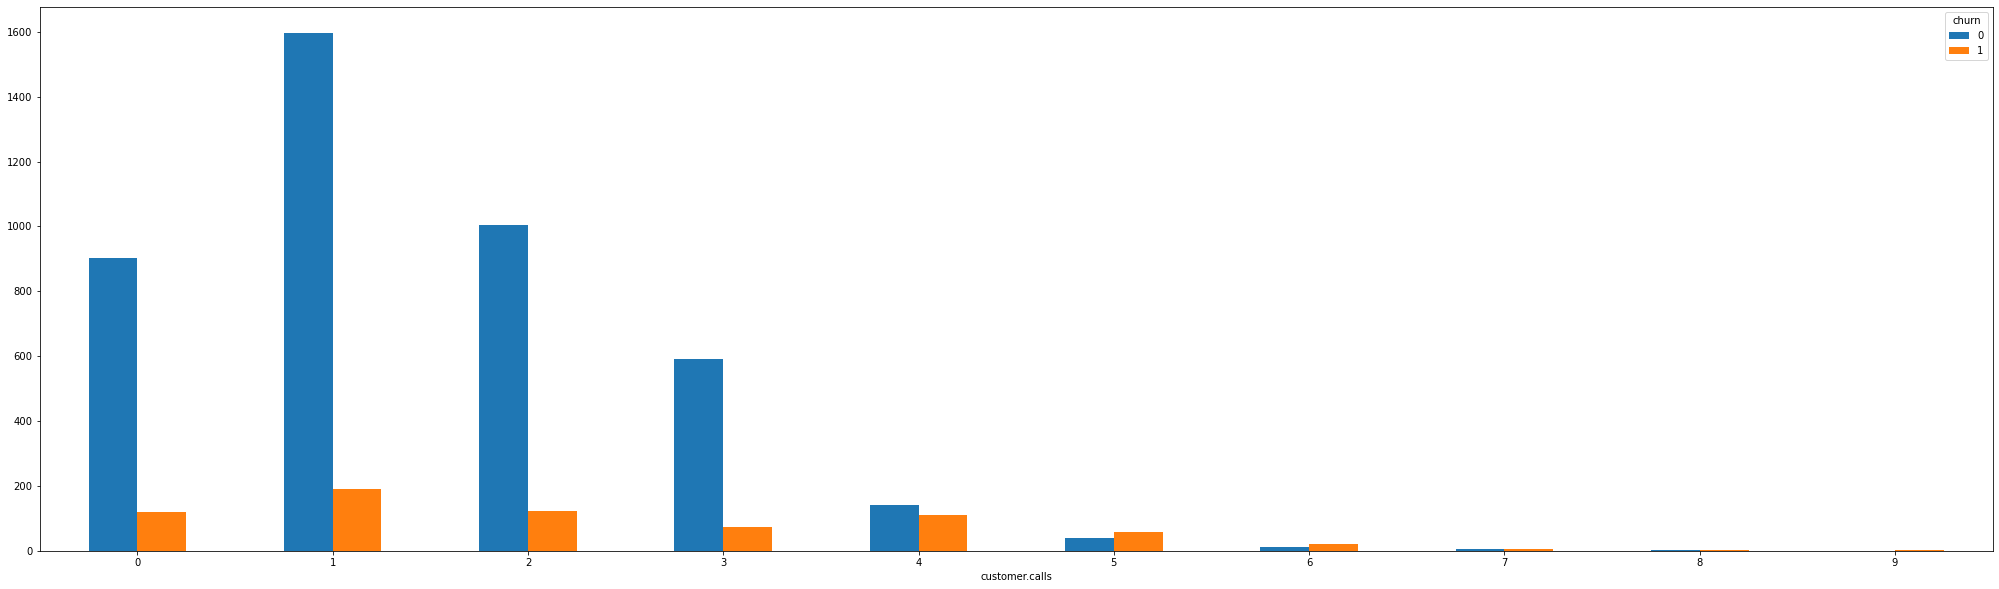

In [39]:
crosstb=pd.crosstab(df['customer.calls'],df.churn)
barplot = crosstb.plot.bar(rot=0,figsize=(35,10))
plt.show()

Here we can see the no of people churnerd and non churned  who call on  customer calls 

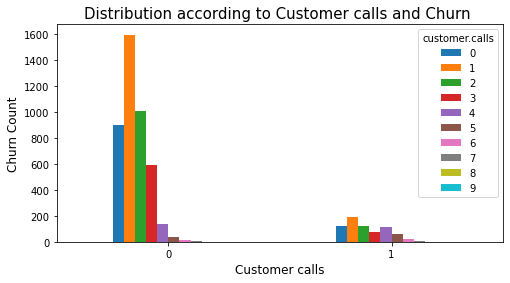

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
crosstb=pd.crosstab(df.churn,df['customer.calls'])
barplot = crosstb.plot.bar(rot=0, ax=ax)
plt.xlabel('Customer calls', fontsize= 12)
plt.ylabel('Churn Count', fontsize= 12)
plt.title("Distribution according to Customer calls and Churn ",fontsize= 15)
plt.show()

Observation : here we can see the no of people churned with respect to no of customer calls 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


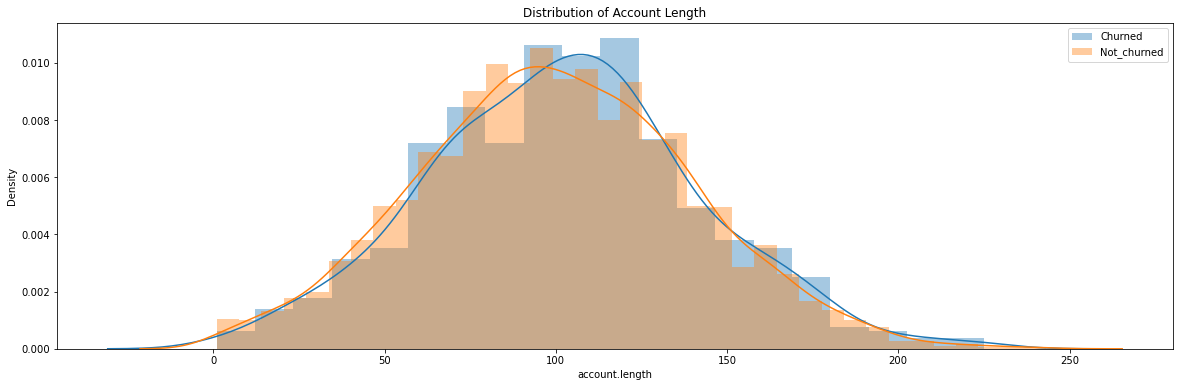

In [41]:
# Now we check distribution according to the Account length 
ac_len_churned = df[df['churn']==1]['account.length']
ac_len_not_churned =df[df['churn']==0]['account.length']
sns.distplot(ac_len_churned,label='Churned')
sns.distplot(ac_len_not_churned,label='Not_churned')
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

Observation : this graph shows us the distribution of people who churned & not churned on the basis of account length 

#### Now some Visualisations based on Charges paid by people 

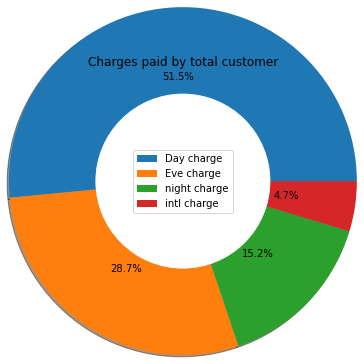

In [42]:
plt.figure(figsize=(4,4))
donut= (df['day.charge'].sum(),df['eve.charge'].sum(),df['night.charge'].sum(), df['intl.charge'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=2)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Charges paid by total customer')
labels = ['Day charge', 'Eve charge', 'night charge', 'intl charge']  
plt.legend(labels, loc="center")
plt.show()


Observation : we can see the % of charges in all the different charges 


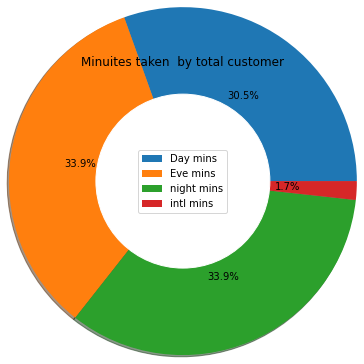

In [43]:
plt.figure(figsize=(4,4))
donut= (df['day.mins'].sum(),df['eve.mins'].sum(),df['night.mins'].sum(), df['intl.mins'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=2)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Minuites taken  by total customer')
labels = ['Day mins', 'Eve mins', 'night mins', 'intl mins ']  
plt.legend(labels, loc="center")
plt.show()



Observation : we can see that the % of mins is almost same in day ,eve & night mins but charges paid by day are much more in comparison of others 

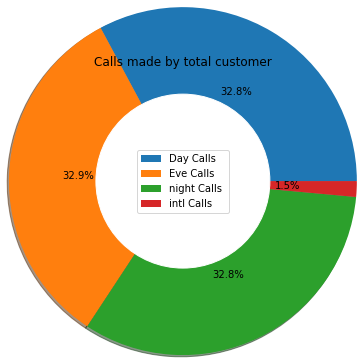

In [44]:
plt.figure(figsize=(4,4))
donut= (df['day.calls'].sum(),df['eve.calls'].sum(),df['night.calls'].sum(), df['intl.calls'].sum()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=2)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Calls made by total customer')
labels = ['Day Calls', 'Eve Calls ', 'night Calls ', 'intl Calls']  
plt.legend(labels, loc="center")
plt.show()

In [45]:
Churned  = df.loc[df['churn']==1]
not_Churned  = df.loc[df['churn']==0]
Churned

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
10,IN,area_code_415,65,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1,0,0
15,NY,area_code_415,161,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1,0,0
21,CO,area_code_408,77,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1,0,0
33,AZ,area_code_408,12,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1,0,0
41,MD,area_code_408,135,41,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NM,area_code_408,137,0,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1,0,1
4980,WA,area_code_408,73,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1,0,0
4990,ND,area_code_510,140,0,7.5,6,2.03,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,1,1,0,0
4991,AZ,area_code_510,97,0,8.8,5,2.38,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,1,1,0,0


In [46]:
not_Churned

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
0,KS,area_code_415,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,OH,area_code_415,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,NJ,area_code_415,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0,0
3,OH,area_code_408,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0,1
4,OK,area_code_415,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0,0,0
4995,HI,area_code_408,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,1,0
4997,DC,area_code_415,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,0,0
4998,DC,area_code_510,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,0,0


In [47]:
daycalls=not_Churned.loc[not_Churned ['day.calls']>100]
daycalls

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
0,KS,area_code_415,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,OH,area_code_415,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,NJ,area_code_415,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0,0
4,OK,area_code_415,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,0,1
11,RI,area_code_415,74,0,9.1,5,2.46,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,WA,area_code_510,80,0,16.2,2,4.37,157.0,101,26.69,208.8,127,17.75,113.3,109,5.10,2,0,0,0
4989,MN,area_code_408,150,0,8.3,2,2.24,170.0,115,28.90,162.7,138,13.83,267.2,77,12.02,0,0,0,0
4994,NC,area_code_408,75,0,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,0,0,0
4995,HI,area_code_408,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,1,0


In [48]:
day_calls=Churned.loc[Churned ['day.calls']>100]
day_calls

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
10,IN,area_code_415,65,0,12.7,6,3.43,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,4,1,0,0
33,AZ,area_code_408,12,0,11.8,3,3.19,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,1,1,0,0
48,ID,area_code_415,119,0,8.8,3,2.38,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,5,1,0,0
57,CO,area_code_408,121,30,5.8,3,1.57,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,3,1,1,0
69,TX,area_code_510,150,0,13.8,3,3.73,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,OR,area_code_510,132,0,13.6,9,3.67,265.8,122,45.19,285.1,90,24.23,183.6,124,8.26,2,1,0,0
4953,ME,area_code_415,90,0,8.7,5,2.35,104.0,104,17.68,170.9,106,14.53,158.8,99,7.15,4,1,0,0
4959,NM,area_code_408,137,0,10.6,2,2.86,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,1,1,0,1
4980,WA,area_code_408,73,0,12.3,2,3.32,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,3,1,0,0


In [49]:
len(daycalls)*100/len(not_Churned)

49.14977870952714

In [50]:
len(day_calls) * 100/len(Churned)

51.48514851485149

Observation: we can see that people with more no of day call tend to be Churned as the Charges are higher for day calls  

In [51]:
evecalls=Churned.loc[Churned ['eve.calls']>100]
eve_day= evecalls.loc[evecalls['day.calls']<100]
eve_day

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
21,CO,area_code_408,77,0,5.7,6,1.54,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5,1,0,0
41,MD,area_code_408,135,41,14.6,15,3.94,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,0,1,1,1
54,WY,area_code_415,87,0,9.7,3,2.62,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,5,1,0,0
99,ID,area_code_415,77,0,9.8,7,2.65,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,2,1,0,0
115,ME,area_code_510,36,42,20.0,6,5.40,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,MA,area_code_510,97,0,6.1,8,1.65,272.8,60,46.38,216.5,113,18.40,245.1,67,11.03,5,1,0,1
4710,KY,area_code_415,122,0,10.4,2,2.81,273.8,94,46.55,237.1,131,20.15,295.9,89,13.32,3,1,0,0
4778,NY,area_code_408,102,48,7.8,4,2.11,134.0,83,22.78,234.3,128,19.92,197.3,107,8.88,6,1,1,0
4895,MS,area_code_415,132,0,7.0,2,1.89,144.3,70,24.53,231.5,125,19.68,304.3,137,13.69,1,1,0,1


In [52]:
nightcalls=Churned.loc[Churned ['night.calls']>100]
night_day=nightcalls.loc[nightcalls['day.calls']<100]
night_day

,state,area.code,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
15,NY,area_code_415,161,0,5.4,9,1.46,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,4,1,0,0
54,WY,area_code_415,87,0,9.7,3,2.62,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,5,1,0,0
99,ID,area_code_415,77,0,9.8,7,2.65,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,2,1,0,0
115,ME,area_code_510,36,42,20.0,6,5.40,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,0,1,1,1
144,VT,area_code_408,117,0,14.1,7,3.81,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,AZ,area_code_415,126,0,6.6,2,1.78,284.0,92,48.28,199.7,78,16.97,203.4,141,9.15,1,1,0,0
4895,MS,area_code_415,132,0,7.0,2,1.89,144.3,70,24.53,231.5,125,19.68,304.3,137,13.69,1,1,0,1
4921,TX,area_code_415,65,0,9.3,2,2.51,143.6,98,24.41,187.7,96,15.95,200.2,104,9.01,3,1,0,0
4939,MN,area_code_408,30,0,11.3,7,3.05,112.9,81,19.19,224.8,68,19.11,188.4,122,8.48,4,1,0,0


In [53]:
intlcalls=Churned.loc[Churned ['intl.calls']>3]
intl_day=intlcalls.loc[intlcalls['day.calls']<100]

In [54]:
len(nightcalls) * 100/len(Churned)

47.66619519094767

In [55]:
len(evecalls) * 100/len(Churned)

48.23196605374823

In [56]:
len(intlcalls) * 100/len(Churned)

52.61669024045262

Observation : We can see that most of the curners are the ones who have intl calls >3 OR 
day,eve and night calls >100 because of their daily calls are high so they tend to churn 

Suggestion : we can see that more people are getting churned due to more charges so we need to come up with a combo plan so that people will get attracted by some combo plans of combined messages and calls 

In [57]:
#Now Performing feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [58]:
df.drop(df.columns[[0,1,2]], axis=1, inplace=True)
df

,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,voice.plan,intl.plan
0,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,1,0
1,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,1,0
2,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0,0
3,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0,1
4,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0,1,0
4996,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1,0,0
4997,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,0,0
4998,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,0,0


In [107]:
df.to_csv('FinalChurn.csv')

In [60]:
X=df.drop('churn', axis=1)
Y=df.churn

In [61]:
X

,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,voice.plan,intl.plan
0,25,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,1,0
1,26,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,1,0
2,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,0
3,0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,1
4,0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,1,0
4996,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,0,0
4997,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0,0
4998,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0,0


In [62]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 5000, dtype: int32

In [63]:
chi_best= SelectKBest(score_func=chi2, k=5)
k_best = chi_best.fit(X,Y)

#getting Scores 
np.set_printoptions(precision=1)
print(k_best.scores_)

[1.1e+03 1.5e+01 1.5e+01 4.0e+00 3.5e+03 5.1e+00 5.9e+02 5.0e+02 7.7e-01
 4.3e+01 1.3e+02 9.7e-01 6.0e+00 2.5e+02 4.5e+01 3.0e+02]


In [64]:
# Importing classification report to get the all the values of the model 
from sklearn.metrics import classification_report,RocCurveDisplay,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc

In [65]:
from sklearn.tree import  DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtc.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
dtc.feature_importances_

array([0. , 0. , 0. , 0. , 0.2, 0. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ,
       0.3, 0.1, 0.2])

### Decision Tree 

In [67]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_D=dtc.fit(X_train,y_train)
model_D.score(X_test,y_test)

0.906

In [68]:
pred=model_D.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       862
           1       0.89      0.36      0.52       138

    accuracy                           0.91      1000
   macro avg       0.90      0.68      0.73      1000
weighted avg       0.90      0.91      0.89      1000



### SVM

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 16), (4000,), (1000, 16), (1000,))

In [71]:
clf = SVC()

param_grid = [{'kernel':['rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(X_train,np.ravel(y_train,order='C'))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 1/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.860 total time=   0.4s
[CV 2/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 2/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.858 total time=   0.4s
[CV 3/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 3/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.858 total time=   0.4s
[CV 4/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 4/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.858 total time=   0.4s
[CV 5/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 5/10; 1/10] END C=0.001, gamma=0.5, kernel=rbf;, score=0.858 total time=   0.4s
[CV 6/10; 1/10] START C=0.001, gamma=0.5, kernel=rbf............................
[CV 6/10; 1/10] END C=0.001, ga

[CV 1/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.1s
[CV 2/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 2/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 3/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 3/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 4/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 4/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 5/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 5/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 6/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 6/10; 6/10] END C=0.001, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 7/10; 6/10] START C=0.001, gamma=0.01, kernel=rbf...........................
[CV 

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['rbf']}],
                   verbose=300)

In [72]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'rbf', 'gamma': 0.5, 'C': 0.001}, 0.85775)

In [73]:
clf = SVC(kernel='linear',C=0.1)
svm1=clf.fit(X_train , y_train)
pred = svm1.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred)


Accuracy = 86.2


array([[862,   0],
       [138,   0]], dtype=int64)

In [74]:
pred=svm1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       862
           1       0.00      0.00      0.00       138

    accuracy                           0.86      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.74      0.86      0.80      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBM 

In [75]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [76]:
XGB= XGBClassifier()
model_X=XGB.fit(X_train, y_train)

In [77]:
y_pred = model_X.predict(X_test)
predictions = [round(value) for value in y_pred]

In [78]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.80%


In [79]:
pred=model_X.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       862
           1       0.94      0.75      0.83       138

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000



### Logistic Regression

In [80]:
x_tr,x_tst,y_tr,y_tst=train_test_split(X,Y,train_size=.80)
f'x_train shape:{x_tr.shape} y_tr.shape:{y_tr.shape} x_tst shape: {x_tst.shape} y_tst.shape:{y_tst.shape}'

'x_train shape:(4000, 16) y_tr.shape:(4000,) x_tst shape: (1000, 16) y_tst.shape:(1000,)'

In [81]:
model_L=LogisticRegression(solver='liblinear',max_iter=1000)
log_m=model_L.fit(x_tr,y_tr)

In [82]:
pred=log_m.predict(x_tst)

In [83]:
print(classification_report(y_tst,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       864
           1       0.57      0.18      0.28       136

    accuracy                           0.87      1000
   macro avg       0.73      0.58      0.60      1000
weighted avg       0.84      0.87      0.84      1000



In [84]:
cnf_matrix=confusion_matrix(y_tst,pred)
cnf_matrix

array([[845,  19],
       [111,  25]], dtype=int64)

## Random Forrest 

In [85]:
from sklearn.ensemble import RandomForestClassifier 
RFC=RandomForestClassifier()

In [86]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_pred = RFC.predict(X_test)
RFC.score(X_test,y_test)

0.956

In [88]:
pred=RFC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       862
           1       0.94      0.73      0.82       138

    accuracy                           0.96      1000
   macro avg       0.95      0.86      0.90      1000
weighted avg       0.96      0.96      0.95      1000



Observation : almost all our models are oversampled so we try smoting our dataset as their are very few responses for churn 

In [89]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [90]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
y_train.value_counts()

0    3431
1     569
Name: churn, dtype: int64

In [91]:
rs=RandomOverSampler()

X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)
y_train_rs.value_counts() 

0    3431
1    3431
Name: churn, dtype: int64

In [92]:
from sklearn.ensemble import RandomForestClassifier 
RFC=RandomForestClassifier()
model_r=RFC.fit(X_train_rs,y_train_rs)

In [93]:
y_pred =model_r.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[852  10]
 [ 35 103]]
0.955
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       862
           1       0.91      0.75      0.82       138

    accuracy                           0.95      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



### Decision tree with Oversampler data 

In [94]:
model_od=dtc.fit(X_train_rs,y_train_rs)
model_od.score(X_test,y_test)

0.86

In [95]:
od_pred=model_od.predict(X_test)
print(classification_report(y_test,od_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       862
           1       0.50      0.74      0.59       138

    accuracy                           0.86      1000
   macro avg       0.72      0.81      0.75      1000
weighted avg       0.89      0.86      0.87      1000



### SVM with Over Sampler data 

In [96]:
model_svm=gsv.fit(X_train_rs,np.ravel(y_train_rs,order='C'))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 1/10; 1/10] END C=10, gamma=0.5, kernel=rbf;, score=0.999 total time=   2.2s
[CV 2/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 2/10; 1/10] END C=10, gamma=0.5, kernel=rbf;, score=0.997 total time=   2.2s
[CV 3/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 3/10; 1/10] END C=10, gamma=0.5, kernel=rbf;, score=1.000 total time=   2.2s
[CV 4/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 4/10; 1/10] END C=10, gamma=0.5, kernel=rbf;, score=1.000 total time=   2.2s
[CV 5/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 5/10; 1/10] END C=10, gamma=0.5, kernel=rbf;, score=1.000 total time=   2.2s
[CV 6/10; 1/10] START C=10, gamma=0.5, kernel=rbf...............................
[CV 6/10; 1/10] END C=10, gamma=0.5, kernel=rb

[CV 1/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.499 total time=   3.2s
[CV 2/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 2/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.499 total time=   3.3s
[CV 3/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 3/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.724 total time=   3.3s
[CV 4/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 4/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.666 total time=   3.3s
[CV 5/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 5/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.733 total time=   3.3s
[CV 6/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 6/10; 6/10] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.641 total time=   3.3s
[CV 7/10; 6/10] START C=0.0001, gamma=0.1, kernel=rbf...........................
[CV 

In [97]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'rbf', 'gamma': 0.5, 'C': 10}, 0.9995633187772925)

In [98]:
clf = SVC(kernel='linear',C=0.1)
svm=clf.fit(X_train_rs , y_train_rs)
pred_svm = svm.predict(X_test)
acc = accuracy_score(y_test, pred_svm) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_svm)

Accuracy = 77.7


array([[671, 191],
       [ 32, 106]], dtype=int64)

In [99]:
pred=svm.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       862
           1       0.36      0.77      0.49       138

    accuracy                           0.78      1000
   macro avg       0.66      0.77      0.67      1000
weighted avg       0.87      0.78      0.81      1000



### XGBM with oversampler Data 

In [100]:
model_x=XGB.fit(X_train_rs,y_train_rs)

In [101]:
y_pred = model_x.predict(X_test)
predictions = [round(value) for value in y_pred]

In [102]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.50%


In [103]:
x_pred=model_x.predict(X_test)
print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       862
           1       0.90      0.75      0.82       138

    accuracy                           0.95      1000
   macro avg       0.93      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



## Logistic with Oversampled data 

In [104]:
log_mod1=model_L.fit(X_train_rs,y_train_rs)

In [105]:
pred_l=log_mod1.predict(X_test)
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       862
           1       0.37      0.73      0.49       138

    accuracy                           0.79      1000
   macro avg       0.66      0.76      0.68      1000
weighted avg       0.87      0.79      0.81      1000



In [106]:
print(confusion_matrix(y_test,pred_l))

[[687 175]
 [ 37 101]]
